# Objetivo:

 - Encontrar o melhor algoritmo  para fazer a previsão do preço do carro.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/robertferro/carros_populares/main/3%20-%20EDA/carros_populares_filtrados.csv'

In [3]:
df = pd.read_csv(url, sep = ',')

In [4]:
# pd.set_option('display.max_rows', 250)
# df.modelo.value_counts().tail(250)
df.head()

,marca,modelo,motor,quilometragem,ano,preco,informacoes
0,chevrolet,agile,1.4,91000.0,2011,25990.0,Agile 1.4 Lt 5p
1,chevrolet,agile,1.4,78400.0,2011,23499.0,Agile 1.4 Ltz 5p
2,chevrolet,agile,1.4,123915.0,2013,28900.0,Agile 1.4 Ltz 5p
3,chevrolet,agile,1.4,91000.0,2013,28000.0,Agile 1.4 Lt 5p
4,chevrolet,agile,1.4,106863.0,2014,31990.0,Agile Agile 1.4 Ltz 8v Flex 4p Manual


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9161 entries, 0 to 9160
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   marca          9161 non-null   object 
 1   modelo         9161 non-null   object 
 2   motor          9161 non-null   float64
 3   quilometragem  9161 non-null   float64
 4   ano            9161 non-null   int64  
 5   preco          9161 non-null   float64
 6   informacoes    9161 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 501.1+ KB


In [6]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
motor,9161.0,1.66,0.48,1.0,1.4,1.6,2.0,4.0
quilometragem,9161.0,87948.85,46157.31,5000.0,49236.0,85888.0,120187.0,200000.0
ano,9161.0,2013.75,4.93,1973.0,2011.0,2014.0,2018.0,2021.0
preco,9161.0,50064.36,30792.26,6000.0,28870.0,41890.0,64990.0,199990.0


In [7]:
df.isna().sum()

marca            0
modelo           0
motor            0
quilometragem    0
ano              0
preco            0
informacoes      0
dtype: int64

In [8]:
dados = df

In [9]:
dados.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
motor,9161.0,1.66,0.48,1.0,1.4,1.6,2.0,4.0
quilometragem,9161.0,87948.85,46157.31,5000.0,49236.0,85888.0,120187.0,200000.0
ano,9161.0,2013.75,4.93,1973.0,2011.0,2014.0,2018.0,2021.0
preco,9161.0,50064.36,30792.26,6000.0,28870.0,41890.0,64990.0,199990.0


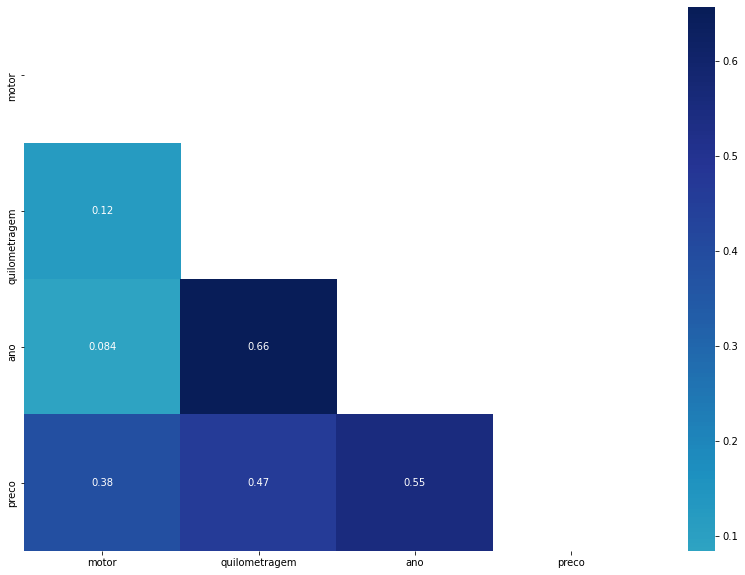

In [10]:
plt.figure(figsize=(14,10))

corr = dados.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, mask=mask, annot=True, center=0, cmap="YlGnBu")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7c4253310>,
      dtype=object)

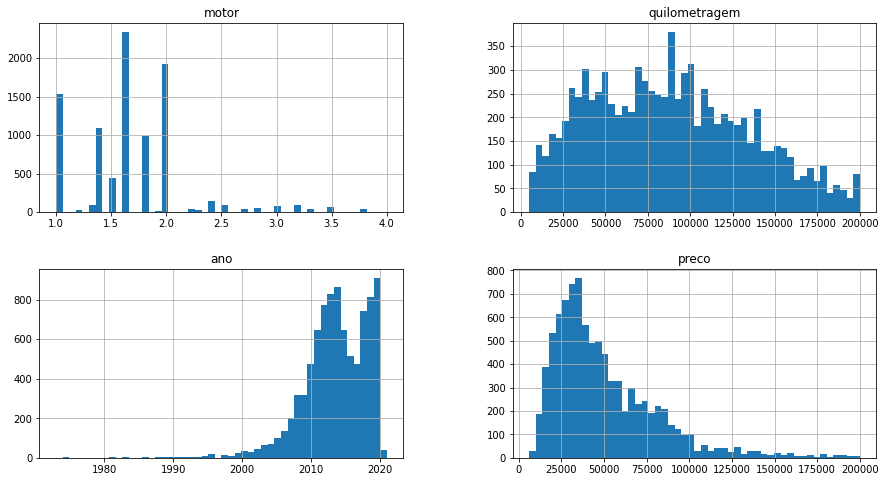

In [11]:
dados.hist(bins=50, figsize=(15,8))

 - Filtrando os valores referentees ao preço.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


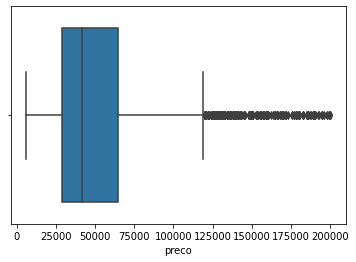

In [12]:
sns.boxplot(dados['preco'])

In [13]:
dados = dados.query('preco <=110000')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


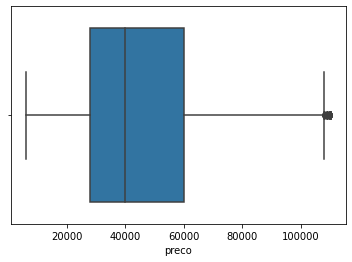

In [14]:
sns.boxplot(dados['preco'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7c3ad4790>,
      dtype=object)

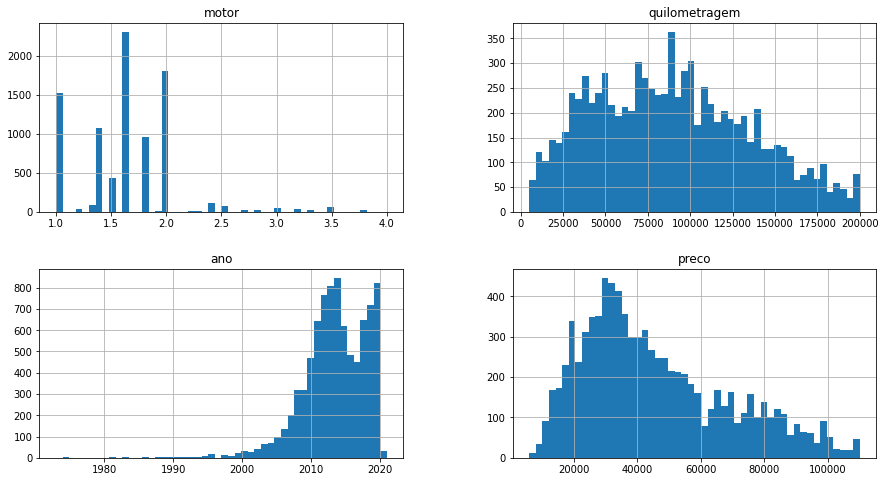

In [15]:
dados.hist(bins=50, figsize=(15,8))

## Definindo as amostras de treino e teste

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
enconder = LabelEncoder()

In [18]:
dados['marca'] = enconder.fit_transform(dados['marca'])
dados['modelo'] = enconder.fit_transform(dados['modelo'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


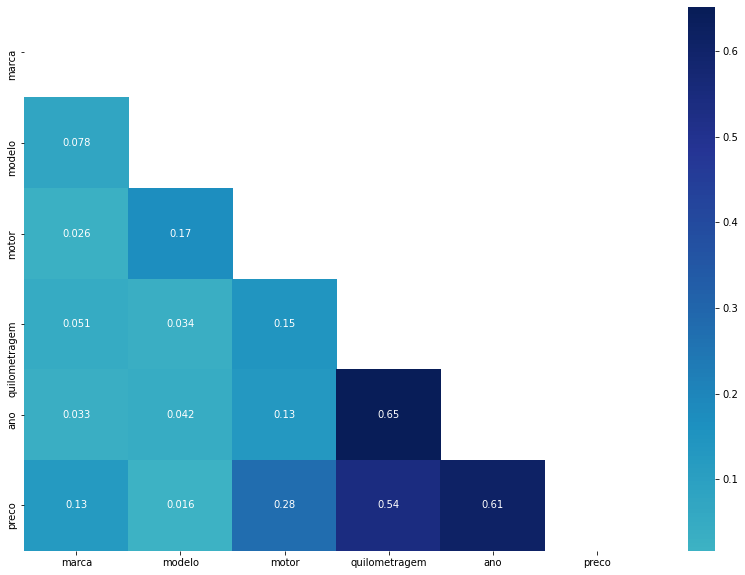

In [19]:
plt.figure(figsize=(14,10))

corr = dados.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, mask=mask, annot=True, center=0, cmap="YlGnBu")

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = dados.drop(columns=['preco','informacoes'])
Y = dados['preco']

In [22]:
X_treino,X_teste,Y_treino,Y_teste = train_test_split(X,Y,test_size=0.25,random_state=0 )

In [23]:
# treino['preco'] = treino['preco'].apply(np.log1p)
# treino['quilometragem'] = treino['quilometragem'].apply(np.log1p)
# teste['preco'] = teste['preco'].apply(np.log1p)
# teste['quilometragem'] = teste['quilometragem'].apply(np.log1p)

 - Modelo "Baseline" (Ponto de partida)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr = LinearRegression()
lr.fit(X_treino, Y_treino)
lr.score(X_teste, Y_teste)

0.5551416824344206

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [28]:
y_pred = lr.predict(X_teste)

In [29]:
MAE  = mean_absolute_error(Y_teste,y_pred)
MSE  = mean_squared_error(Y_teste,y_pred)
RMSE = np.sqrt(mean_squared_error(Y_teste,y_pred))
R2 = r2_score(Y_teste, y_pred)


print('MAE = {:0.4f}'.format(MAE))
print('MSE = {:0.4f}'.format(MSE))
print('RMSE = {:0.4f}'.format(RMSE))
print('R2 = {:0.4f}'.format(R2))

MAE = 11649.2042
MSE = 235979246.9682
RMSE = 15361.6160
R2 = 0.5551


 - Machine learning

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")


regressor_list = [
                  DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  MLPRegressor(),
                  XGBRegressor(),
           
                  ]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_treino, Y_treino)
  train_score = reg.score(X_treino, Y_treino)
  test_score = reg.score(X_teste, Y_teste)
  print('Train score', train_score)
  print('Test score', test_score)
  print('='*80)

Treinando DecisionTreeRegressor
Train score 0.9939729577118595
Test score 0.7297353125229677
Treinando RandomForestRegressor
Train score 0.9708301308546954
Test score 0.8319661098386852
Treinando MLPRegressor
Train score 0.316404605551845
Test score 0.323129035877065
Treinando XGBRegressor
[23:25:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train score 0.7894286132570767
Test score 0.7715604595822678


In [31]:
# repetindo processo com validação cruzada
import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score


regressor_list = [
                  DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  MLPRegressor(),
                  XGBRegressor(),
                  ]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_treino, Y_treino)
  train_score = reg.score(X_treino, Y_treino)
  val_score = cross_val_score(reg, X_treino, Y_treino, cv=5)
  test_score = reg.score(X_teste, Y_teste)
  print('Train score', train_score)
  print('Validation score', val_score)
  print('Test score', test_score)
  print('='*80)

Treinando DecisionTreeRegressor
Train score 0.9939729577118595
Validation score [0.70759621 0.67321038 0.67885152 0.714768   0.67956455]
Test score 0.7185291957953357
Treinando RandomForestRegressor
Train score 0.9710897203864072
Validation score [0.82874791 0.78057934 0.80459832 0.84043854 0.82584289]
Test score 0.8300095219014711
Treinando MLPRegressor
Train score 0.3184366575966429
Validation score [0.36564016 0.29934179 0.25733474 0.35040794 0.26394466]
Test score 0.3220210931713502
Treinando XGBRegressor
[23:25:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:25:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:25:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:25:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favo

In [32]:
#  Todo: calibração do modelo
from sklearn.model_selection import GridSearchCV
parameters=[{'learning_rate':[0.1,0.2,0.3,0.4,0.5],
             'max_depth':[3,4,5,6,7,8],
             'n_estimators':[50, 100,150,200,250]}]
            
xgb = XGBRegressor(n_estimators=100, max_depth=1)
gs = GridSearchCV(xgb,parameters,scoring='r2',n_jobs=-1,cv=5)
gs.fit(X_treino, Y_treino)
xgb = gs.best_estimator_

train_score = xgb.score(X_treino, Y_treino)
val_score = cross_val_score(xgb, X_treino, Y_treino, cv=5)
test_score = xgb.score(X_teste, Y_teste)
print('Train score', train_score)
print('Validation score', val_score)
print('Test score', test_score)

[23:30:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:30:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:30:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:30:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:30:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:30:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train score 0.9073221912231683
Validation score [0.83541881 0.79300586 0.81954453 0.862651   0.84165578]
Test score 0.8404710369878556


 - Calculando o erro

In [33]:
y_pred = xgb.predict(X_teste)

In [34]:
MAE  = mean_absolute_error(Y_teste,y_pred)
MSE  = mean_squared_error(Y_teste,y_pred)
RMSE = np.sqrt(mean_squared_error(Y_teste,y_pred))
R2 = r2_score(Y_teste, y_pred)


print('MAE = {:0.4f}'.format(MAE))
print('MSE = {:0.4f}'.format(MSE))
print('RMSE = {:0.4f}'.format(RMSE))
print('R2 = {:0.4f}'.format(R2))

MAE = 5781.9678
MSE = 84623627.5119
RMSE = 9199.1101
R2 = 0.8405


## Gridserch RandomForest

In [35]:
from sklearn.model_selection import GridSearchCV
parameters=[{
            "max_features": ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            'max_depth':[3,4,5,6,7,8,9,10],
            'n_estimators':np.arange(1,51,5)}]
            
reg = RandomForestRegressor(n_estimators=100, max_depth=1)
gs = GridSearchCV(reg,parameters,scoring='r2',n_jobs=-1,cv=5, refit = True)
gs.fit(X_treino, Y_treino)
reg = gs.best_estimator_

train_score = reg.score(X_treino, Y_treino)
val_score = cross_val_score(reg, X_treino, Y_treino, cv=5)
test_score = reg.score(X_teste, Y_teste)
print('Train score', train_score)
print('Validation score', val_score)
print('Test score', test_score)

Train score 0.8810001827949828
Validation score [0.81996301 0.77942754 0.7901421  0.83218378 0.82324343]
Test score 0.8175436856272933


In [36]:
y_pred = reg.predict(X_teste)

MAE  = mean_absolute_error(Y_teste,y_pred)
MSE  = mean_squared_error(Y_teste,y_pred)
RMSE = np.sqrt(mean_squared_error(Y_teste,y_pred))
R2 = r2_score(Y_teste, y_pred)


print('MAE = {:0.4f}'.format(MAE))
print('MSE = {:0.4f}'.format(MSE))
print('RMSE = {:0.4f}'.format(RMSE))
print('R2 = {:0.4f}'.format(R2))

MAE = 6395.5980
MSE = 96785655.0505
RMSE = 9837.9701
R2 = 0.8175
